##General Code

In [75]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pysentani

In [76]:
survey = pd.read_excel('../data-clean/sentani-merged-cleaned-2015-06-10.xlsx',na_values=[''])
print('number of entries =', len(survey))
print('number of columns =', len(survey.columns))

number of entries = 1184
number of columns = 274


In [77]:
pysentani.similar_columns(survey,'HP')

HP_y_n
HP
HP_charging_source
HP_charging_price
HP_charging_frequency
HP_quantity


In [78]:
survey['electricity_expenditure_monthly'] = pysentani.elec_expenditure_monthly(survey)
survey['electricity_expenditure_monthly_log'] = survey['electricity_expenditure_monthly'].dropna().replace(0, 1)
survey['electricity_expenditure_monthly_log'] = np.log10(survey['electricity_expenditure_monthly_log'])
survey['income_monthly'] = pysentani.income_monthly(survey)
survey['access_type'] = pysentani.access_type(survey)
survey['income_monthly'] = survey['income_monthly'].replace(0, 1)
survey['income_monthly_log'] = np.log10(survey['income_monthly'])

##Create New Data Frame to Hold Percent Ownership Data

In [84]:
household_survey = survey[survey['demand_point'] == 'household']

app_series = ['app_buy/rice_cooker','app_buy/TV','app_buy/fridge','app_buy/fan','app_buy/lighting','app_buy/radio']



def get_ownership(app):
    app_now = 'app_now' + app[7:]
    return app_now

pao_ls = []

for aps in app_series:
    
    ownership = get_ownership(aps)
    at_series = ['PLN_grid','PLN_microgrid','community_microgrid','no_access'] 
    temp_app_df = pd.crosstab(household_survey[household_survey[ownership] == False]['access_type'],household_survey[aps])
    
    for ats in at_series:
        percent_demand = (temp_app_df[1.0][ats]/(temp_app_df[1.0][ats] + temp_app_df[0.0][ats])) * 100
        pao_ls.append({'Access Type':ats,'Appliance':aps,'percent_demand':percent_demand})


pao_df = pd.DataFrame(pao_ls)


pao_df['Appliance'] = pao_df['Appliance'].str[8:]

pao_df.replace(to_replace = {'Access Type': {'PLN_grid': 'PLN Grid',
                                                       'community_microgrid': 'Community Microgrid',
                                                       'PLN_microgrid': 'PLN Microgrid',
                                                       'no_access': 'No Access'}},
                                                       inplace = True)


##Format and Display Plot of Percent Appliance Ownership by Access Type

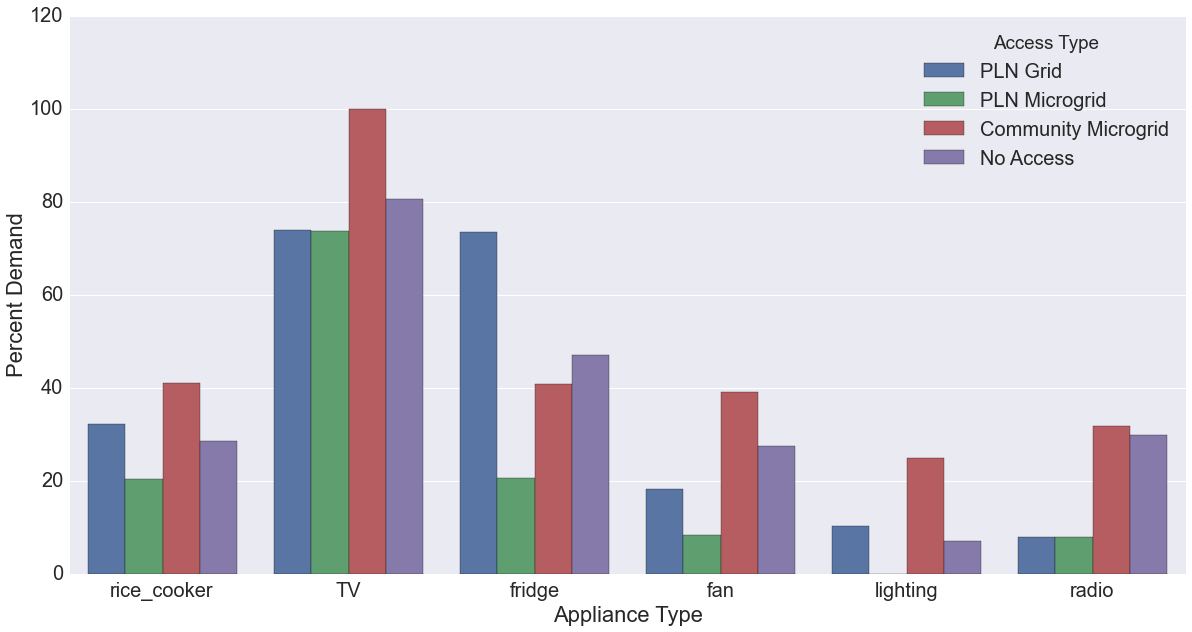

In [85]:
sns.set(font_scale = 2)

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 20
fig_size[1] = 10
plt.rcParams["figure.figsize"] = fig_size

fig, ax = plt.subplots()

ax = sns.barplot(x="Appliance", y="percent_demand", hue="Access Type", data=pao_df)


ax.set(xlabel='Appliance Type', ylabel='Percent Demand')

plt.ylim(0,120)

fig.savefig('test.pdf')


This graph shows - divided by access type - the percent of non-owners who said they would like to buy specific appliances.  